In [1]:
import sys

sys.path.insert(1,'/home/hratch/anaconda3/lib/python3.7/site-packages/')
import networkx as nx

sys.path.insert(1, '../../../cell2cell/')
import cell2cell as c2c


ImportError: cannot import name '_mklinit'

In [2]:
import numpy as np

ImportError: cannot import name '_mklinit'

In [8]:
from cell2cell.tensor.tensor import BaseTensor

ModuleNotFoundError: No module named 'cell2cell.tensor'

In [6]:
import sklearn


ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of /home/hratch/anaconda3/lib/python3.7/site-packages/sklearn/__check_build:
setup.py                  __init__.py               _check_build.cpython-37m-x86_64-linux-gnu.so
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [ ]:
import tensorly as tl
import numpy as np

In [1]:


sys.path.insert(1, '../../../scripts/')
from simulation.simulate import Simulate

ModuleNotFoundError: No module named 'cell2cell'

In [2]:
import sys
sys.path.insert(1, '../../../scripts/')
from simulation.simulate import Simulate

ImportError: Unable to import required dependencies:
numpy: cannot import name '_mklinit'

In [6]:
sys.path.insert(1, '../../../scripts/')
from simulation.simulate import Simulate

ModuleNotFoundError: No module named 'networkx'

In [5]:
import sys
sys.path.insert(1,'../../../../scripts/')
from simulate import Simulate

ModuleNotFoundError: No module named 'simulate'

In [10]:
t1 = c2c.io.load_variable_with_pickle('tensor_cci.pickle')

In [11]:
t1

array([[[[nan,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., nan,  0., ...,  0.,  0.,  0.],
         [ 0.,  0., nan, ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ..., nan,  0.,  0.],
         [ 0.,  0.,  0., ...,  0., nan,  0.],
         [ 0.,  0.,  0., ...,  0.,  0., nan]],

        [[nan,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., nan,  0., ...,  0.,  0.,  0.],
         [ 0.,  0., nan, ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ..., nan,  0.,  0.],
         [ 0.,  0.,  0., ...,  0., nan,  0.],
         [ 0.,  0.,  0., ...,  0.,  0., nan]],

        [[nan,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., nan,  0., ...,  0.,  0.,  0.],
         [ 0.,  0., nan, ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ..., nan,  0.,  0.],
         [ 0.,  0.,  0., ...,  0., nan,  0.],
         [ 0.,  0.,  0., ...,  0.,  0., nan]],

        ...,

        [[nan,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., nan,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.

In [12]:
t1.shape

(12, 3000, 50, 50)

In [13]:
t2 = np.nan_to_num(t1, nan=0.0)

In [14]:
tensor = BaseTensor()

In [15]:
tensor.tensor = t2
tensor.order_names = [['Context-{}'.format(c+1) for c in range(t2.shape[0])],
                      ['LR-{}'.format(c+1) for c in range(t2.shape[1])],
                      ['Sender-{}'.format(c+1) for c in range(t2.shape[2])],
                      ['Receiver-{}'.format(c+1) for c in range(t2.shape[3])]
                     ]

(<Figure size 288x162 with 1 Axes>,
 [(1, 1.0),
  (2, 1.0),
  (3, 0.9585285935692773),
  (4, 0.6620112105380191),
  (5, 0.5298737949347292)])

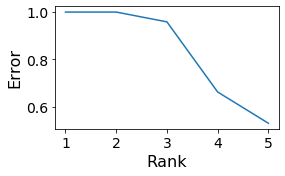

In [16]:
tensor.elbow_rank_selection(5)

In [17]:
r = 4

In [18]:
tensor.compute_tensor_factorization(rank=r)

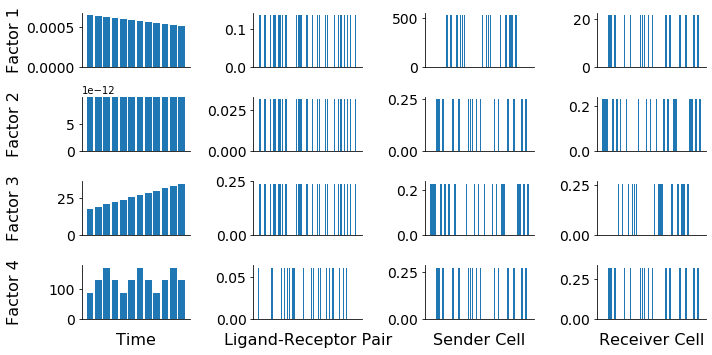

In [19]:
fig, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=tensor,
                                             order_labels=['Time', 'Ligand-Receptor Pair', 'Sender Cell', 'Receiver Cell'],
                                             #metadata = tensor.order_names,
                                             #sample_col='Order',
                                             #group_col='Element',
                                             #meta_cmaps=['viridis', 'tab20', 'Pastel1', 'Pastel1'],
                                             fontsize=14,
                                             #filename='./outputs/TF-LogMean.svg'
                                            )